<a href="https://colab.research.google.com/github/Priyank315660/ML-Model/blob/main/Sentiment_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
# Load the dataset
file_path = '/content/Sentiment_Stock_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108751 entries, 0 to 108750
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108751 non-null  int64 
 1   Sentiment   108751 non-null  int64 
 2   Sentence    108750 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


(None,
    Unnamed: 0  Sentiment                                           Sentence
 0           0          0  According to Gran , the company has no plans t...
 1           1          1  For the last quarter of 2010 , Componenta 's n...
 2           2          1  In the third quarter of 2010 , net sales incre...
 3           3          1  Operating profit rose to EUR 13.1 mn from EUR ...
 4           4          1  Operating profit totalled EUR 21.1 mn , up fro...)

In [ ]:
# Drop the 'Unnamed: 0' column
data = data.drop(columns=['Unnamed: 0'])

# Drop rows with missing values in 'Sentence'
data = data.dropna(subset=['Sentence'])

# Confirm changes
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 108750 entries, 0 to 108750
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sentiment  108750 non-null  int64 
 1   Sentence   108750 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


(None,
    Sentiment                                           Sentence
 0          0  According to Gran , the company has no plans t...
 1          1  For the last quarter of 2010 , Componenta 's n...
 2          1  In the third quarter of 2010 , net sales incre...
 3          1  Operating profit rose to EUR 13.1 mn from EUR ...
 4          1  Operating profit totalled EUR 21.1 mn , up fro...)

In [ ]:
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',
    'now'
])

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Split into words
    words = text.split()
    # Remove stopwords and join back to a single string
    processed_text = ' '.join(word for word in words if word not in stop_words)
    return processed_text

# Apply preprocessing to the 'Sentence' column
data['Processed_Sentence'] = data['Sentence'].apply(preprocess_text)

# Show processed data
data[['Sentence', 'Processed_Sentence']].head()

,Sentence,Processed_Sentence
0,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sales doubled...
2,"In the third quarter of 2010 , net sales incre...",third quarter 2010 net sales increased 52 eur ...
3,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose eur 131 mn eur 87 mn cor...
4,"Operating profit totalled EUR 21.1 mn , up fro...",operating profit totalled eur 211 mn eur 186 m...


from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Sentence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('Processed_Sentence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Processed_Sentence'].value_counts()
    for x_label, grp in _df_18.groupby('Sentence')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sentence')
_ = plt.ylabel('Processed_Sentence')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the processed text
X = tfidf.fit_transform(data['Processed_Sentence'])

# Convert to DataFrame for better visualization
X_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Show the first 5 rows of the vectorized data
X_tfidf.head()

,000,01,03,08,10,100,1000,10000,100000,10m,...,youtube,youve,yrs,zealand,zero,zika,zimbabwe,zoe,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.285354,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0['2007'].plot(kind='hist', bins=20, title='2007')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['2010'].plot(kind='hist', bins=20, title='2010')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['52'].plot(kind='hist', bins=20, title='52')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['77'].plot(kind='hist', bins=20, title='77')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='2007', y='2010', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='2010', y='52', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='52', y='77', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='77', y='97', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['2010']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('2010')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['52']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('52')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['77']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('77')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['000']
  ys = series['according']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('000', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('000')
_ = plt.ylabel('according')

from matplotlib import pyplot as plt
_df_12['2007'].plot(kind='line', figsize=(8, 4), title='2007')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['2010'].plot(kind='line', figsize=(8, 4), title='2010')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['52'].plot(kind='line', figsize=(8, 4), title='52')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['77'].plot(kind='line', figsize=(8, 4), title='77')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ... (your existing code) ...

# Assuming 'Sentiment' is the target variable
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Reduce the number of trees to 10 for faster training
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.5298390804597701,
 '              precision    recall  f1-score   support\n\n           0       0.52      0.55      0.53     10630\n           1       0.54      0.52      0.53     11120\n\n    accuracy                           0.53     21750\n   macro avg       0.53      0.53      0.53     21750\nweighted avg       0.53      0.53      0.53     21750\n')

new: 0.0036
says: 0.0031
world: 0.0022
police: 0.0021
war: 0.0019
football: 0.0019
russia: 0.0018
israel: 0.0018
leader: 0.0017
uk: 0.0017
years: 0.0017
government: 0.0016
england: 0.0016
man: 0.0016
people: 0.0016
review: 0.0015
united: 0.0015
city: 0.0015
china: 0.0015
year: 0.0015


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

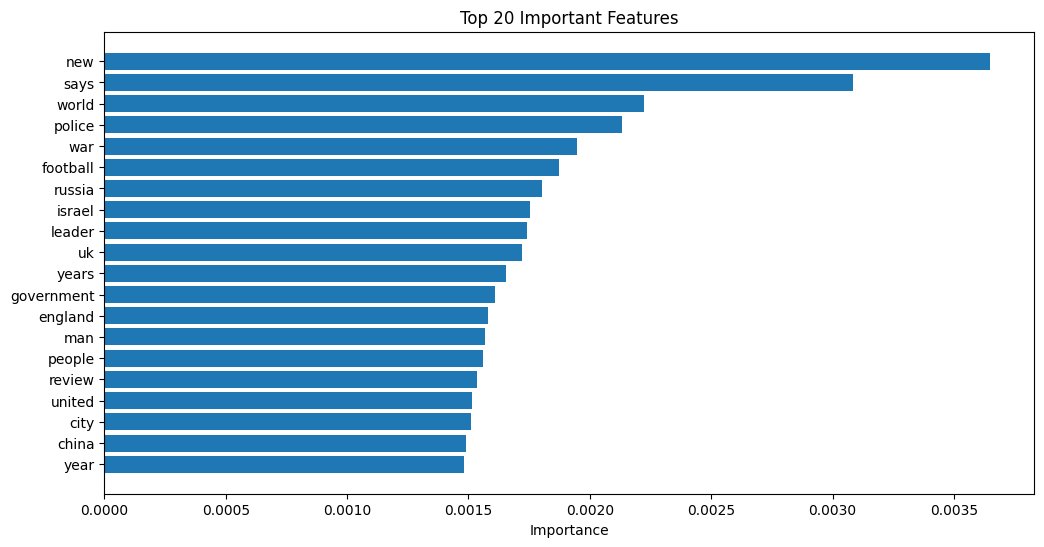

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the model
best_model = rf_model
importances = best_model.feature_importances_
vectorizer = tfidf
features = vectorizer.get_feature_names_out()

# Sort by importance
indices = np.argsort(importances)[::-1]
top_n = 20  # Show top 20 features
top_features = [(features[i], importances[i]) for i in indices[:top_n]]

for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")
    plt.figure(figsize=(12, 6))
plt.barh([x[0] for x in top_features][::-1], [x[1] for x in top_features][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Important Features")
plt.show()
